# Predicting the Number of Medals a country wins using Machine Learning
This project looks into various Python based machine learning and data science libraries in an attempt to build a machine learning model which is capable of predicting the number of medals a country wins using machine learning with reagrds to the number of atheletes representing it 

# Data:
We'll be using data from the Olympics, which was originally on Kaggle.

You can download the file we'll use in this project here:

teams.csv - the team-level data that we use in this project.

# Evaluation:
The evaluation Metric we will use is the inbuilt R-squared metric. To minimise this Coefficient of Determination is the aim of this project. We will then compare our own model with the scikit learns linear regression model

Error Metric used here is the mean absolute error
model formula= y=ax1+bx2+c

# Features:
The key fields are in team.csv are:
* team
* year
* athletes
* events
* age
* height
* weight
* prev_medals
* medals
https://docs.google.com/spreadsheets/d/1Bg0i7Kgzt0ltNFJrWBkSByNaa_RW_u74m4dHxjIRTl0/edit?usp=sharing

In [1]:
import pandas as pd

In [6]:
teams = pd.read_csv("teams.csv")
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,NaN,NaN
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [7]:
teams_old = teams.copy()
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]


In [8]:
teams.corr()["medals"]

C:\Users\pgyot\AppData\Local\Temp\ipykernel_12872\3553819720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()["medals"]


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.922383
medals         1.000000
Name: medals, dtype: float64

For linear model strong correlation is required
we find that in the number of athletes and the previous medals data

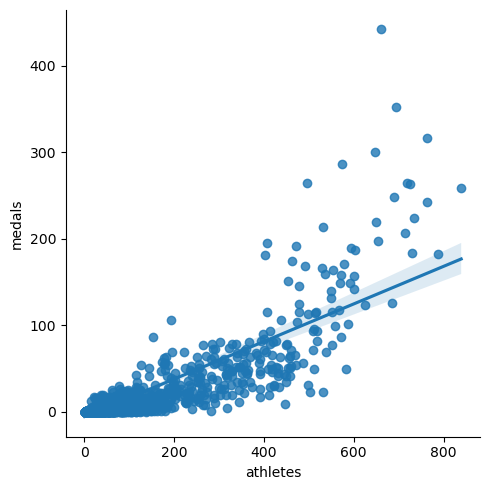

In [10]:
import seaborn as sns
sns.lmplot(x='athletes',y='medals',data=teams,fit_reg=True);
# the area around the regression line is the confidence interval 

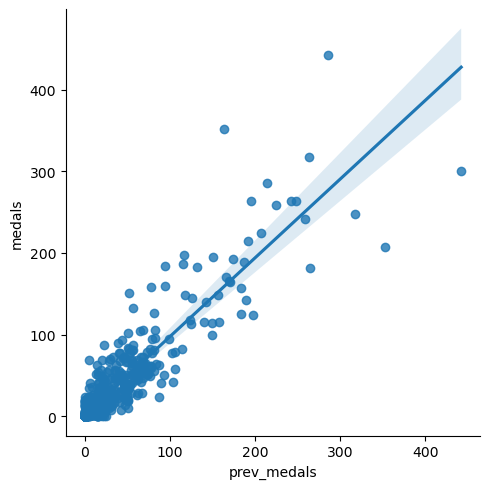

In [11]:
sns.lmplot(x='prev_medals',y='medals',data=teams,fit_reg=True);

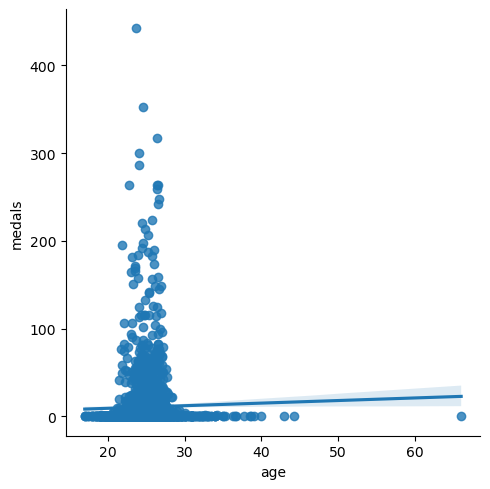

In [12]:
sns.lmplot(x='age',y='medals',data=teams,fit_reg=True);

<Axes: ylabel='Frequency'>

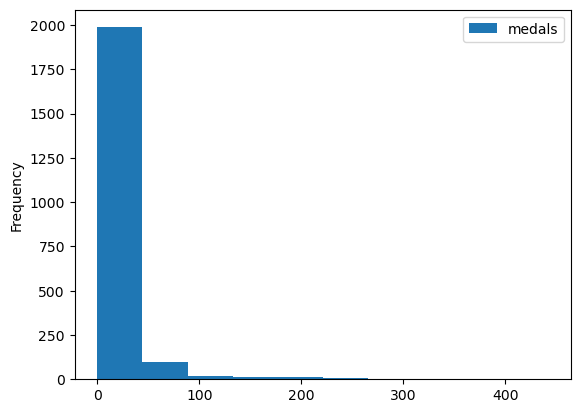

In [14]:
teams.plot.hist(y="medals")

this means that the model is not balanced, most countries earn between 0 and 50 while a very few countries earn more medals

In [15]:
teams.isna().sum()

team             0
country          0
year             0
athletes         0
age              0
prev_medals    219
medals           0
dtype: int64

Only previous medals have missing data as some countries join the olympics for the first time. It is wise to drop these rows because we cannot predict how well these countries might do

In [16]:
teams.shape

(2144, 7)

In [17]:
teams = teams.dropna()
teams.shape

(1925, 7)

Since this is a time series data we need to split it into train and test data set

In [18]:
train = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

In [19]:
train.shape , test.shape

((1520, 7), (405, 7))

## Modeling

In [20]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [21]:
predictors = ["athletes", "prev_medals"]
reg.fit(train[predictors], train["medals"])

LinearRegression()

In [51]:
reg.score(test[predictors],test["medals"])

0.9199697805074554

In [24]:
predictions = reg.predict(test[predictors])

In [27]:
predictions

array([-8.16703556e-01, -1.01850742e+00, -1.30971711e+00, -1.57878893e+00,
        2.16522433e+00,  3.75751739e+00, -1.57878893e+00, -1.71332484e+00,
        3.71981770e-01, -2.33429825e-01, -1.71332484e+00, -1.37698506e+00,
        4.68396146e+01,  2.81033909e+01,  4.67542217e+00,  2.59096992e+00,
       -1.71332484e+00, -1.51152097e+00, -1.71332484e+00, -1.71332484e+00,
        1.46144052e+02,  1.19740136e+02,  6.35797541e+00,  3.73537952e+00,
        7.32101028e+00,  1.02799459e+01,  5.30297163e+00,  3.62212711e+00,
       -1.51152097e+00, -1.51152097e+00, -1.44425302e+00, -1.10791324e+00,
       -1.57878893e+00, -1.30971711e+00,  1.13800798e+01,  9.58683725e+00,
       -1.64605688e+00, -1.57878893e+00, -1.44425302e+00, -1.44425302e+00,
       -1.84786075e+00, -1.84786075e+00, -1.44425302e+00, -1.24244915e+00,
       -1.78059279e+00, -1.78059279e+00,  3.25626508e+01,  2.50976165e+01,
       -1.64605688e+00, -1.17518120e+00, -1.71332484e+00, -2.78559916e-01,
        7.80442564e+01,  

In [28]:
test["predictions"] = predictions
test.loc[test["predictions"] < 0.7, "predictions"] = 0
test["predictions"] = test["predictions"].round()
# since medals  are whole numbers
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [29]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"], test["predictions"])
error

3.269135802469136

In [30]:
teams.describe()["medals"]

count    1925.000000
mean       10.852987
std        33.664955
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       442.000000
Name: medals, dtype: float64

In [31]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,286.0
2054,USA,United States,2016,719,26.4,248.0,264,235.0


In [32]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,11.0


In [35]:
errors = (test["medals"] - predictions).abs()
error_by_team = errors.groupby(test["team"]).mean()
error_by_team

team
AFG    1.417605
ALB    1.444253
ALG    1.461371
AND    1.646057
ANG    0.302706
         ...   
VIE    1.246507
VIN    1.746959
YEM    1.746959
ZAM    1.511521
ZIM    0.887133
Name: medals, Length: 204, dtype: float64

In [37]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [45]:
error_ratio =  error_by_team / medals_by_team 
error_ratio

team
AFG    2.835211
ALB         inf
ALG    0.974247
AND         inf
ANG         inf
         ...   
VIE    1.246507
VIN         inf
YEM         inf
ZAM         inf
ZIM         inf
Name: medals, Length: 204, dtype: float64

In [46]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [47]:
error_ratio

team
AFG    2.835211
ALG    0.974247
ARG    0.827878
ARM    0.440636
AUS    0.356552
         ...   
UKR    0.907815
USA    0.130011
UZB    0.666989
VEN    1.585072
VIE    1.246507
Name: medals, Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

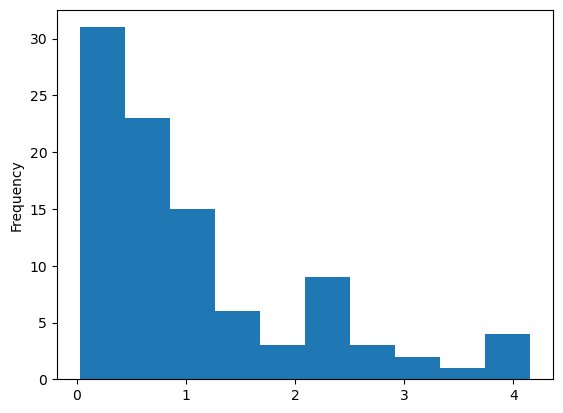

In [48]:
error_ratio.plot.hist();

In [49]:
error_ratio.sort_values()

team
FRA    0.024745
CAN    0.067103
RUS    0.079154
NZL    0.089339
CZE    0.097096
         ...   
PHI    3.350362
JOR    3.821238
BDI    3.888506
AUT    4.046677
NIG    4.157578
Name: medals, Length: 97, dtype: float64